# Install

```bash
conda install -c mjirik -c conda-forge -c SimpleITK io3d sed3
```

In [2]:
import io3d
import matplotlib.pyplot as plt

# Alternative 2: read by url

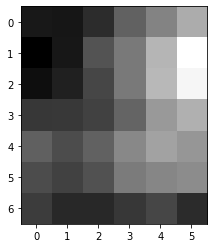

In [3]:
import io3d
import matplotlib.pyplot as plt

datap = io3d.read("http://home.zcu.cz/~mjirik/lisa/sample_data/nrn4.pklz")
plt.imshow(datap.data3d[5, :, :], cmap="gray")

# Download the data

Download the data and put it into the default directory `~/data/`. It will take few minutes.

In [ ]:
io3d.datasets.download("3Dircadb1.1")

downloading from 'http://ircad.fr/softwares/3Dircadb/3Dircadb1/3Dircadb1.1.zip' to 'h:\medical\orig'
Downloading: http://ircad.fr/softwares/3Dircadb/3Dircadb1/3Dircadb1.1.zip Bytes: 39439331


# Read intensity data

In [4]:
datap = io3d.read_dataset("3Dircadb1", "data3d", 1)
# datap.data3d is equal to datap["data3d"]
datap["data3d"]

array([[[-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        ...,
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024]],

       [[-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        ...,
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024]],

       [[-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        ...,
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -10

# Alternative 1: read data by filename

In [5]:
pth = io3d.datasets.get_dataset_path("3Dircadb1", "data3d", 1)
pth

WindowsPath('h:/medical/orig/3Dircadb1.1/PATIENT_DICOM')

In [6]:
datap = io3d.read(pth)

# Show one slice

In [7]:
datap.data3d.shape

(129, 512, 512)

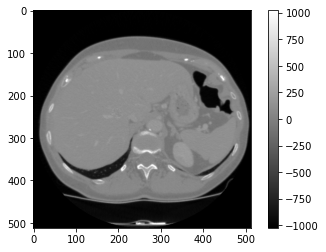

In [8]:
plt.imshow(datap.data3d[30, :, :], cmap="gray")
plt.colorbar()

# Show multiple slices

In [9]:
import sed3

PyQt5 detected


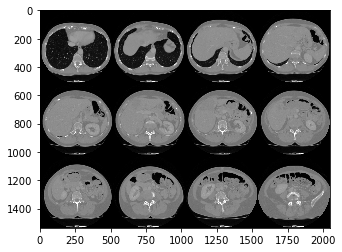

In [10]:
sed3.show_slices(datap.data3d, slice_number=12)

# Load segmentations

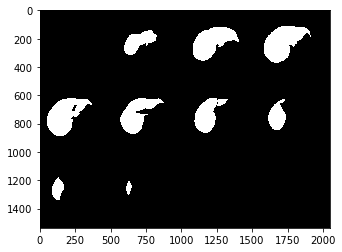

In [11]:
datap_liver = io3d.read_dataset("3Dircadb1", "liver", 1)
sed3.show_slices(datap_liver.data3d, slice_number=12)

# See segmentations together with intensity image

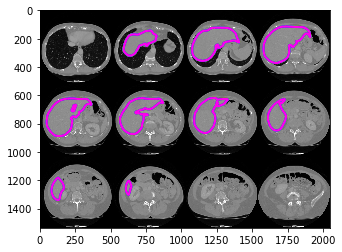

In [12]:
sed3.show_slices(datap.data3d, slice_number=12, contour=datap_liver.data3d)

# Interactive view

In [13]:
sed3.ipy_show_slices(datap.data3d, contour=datap_liver.data3d)

interactive(children=(IntSlider(value=0, continuous_update=False, description='slice_number', max=128), IntSli…

<function sed3.sed3.ipy_show_slices.<locals>.nbw_show_slices_fcn(image, slice_number, contour, seeds, axis)>

# Interactive view in external window (does not work from jupyter)

C:\Users\Jirik\Miniconda3\envs\lisa3qt5\lib\site-packages\sed3-1.6.3-py3.8.egg\sed3\sed3.py:512: UserWarning: No contour levels were found within the data range.
C:\Users\Jirik\Miniconda3\envs\lisa3qt5\lib\site-packages\sed3-1.6.3-py3.8.egg\sed3\sed3.py:212: MatplotlibDeprecationWarning: 
The on_mappable_changed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use update_normal instead.


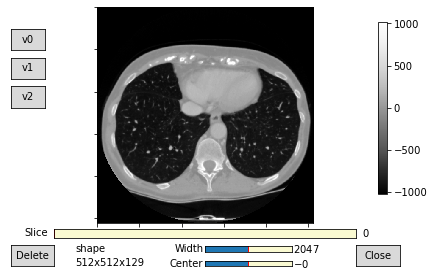

In [14]:
ed = sed3.sed3(datap.data3d, contour=datap_liver.data3d)
seeds = ed.show()

# Resize image

Before resize the z axis:

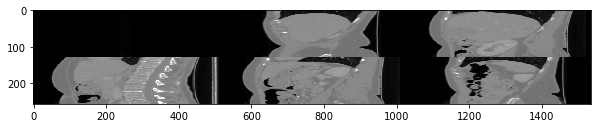

[1.600000023841858, 0.569999992847443, 0.569999992847443]


In [15]:
plt.figure(figsize=[10, 8])
sed3.show_slices(datap.data3d, slice_number=6, axis=2)
print(datap.voxelsize_mm)

In [18]:
new_voxelsize_mm = [6, 6, 6]
data3d = io3d.image_manipulation.resize_to_mm(
    datap.data3d, voxelsize_mm=datap.voxelsize_mm, new_voxelsize_mm=new_voxelsize_mm
)

After resize:

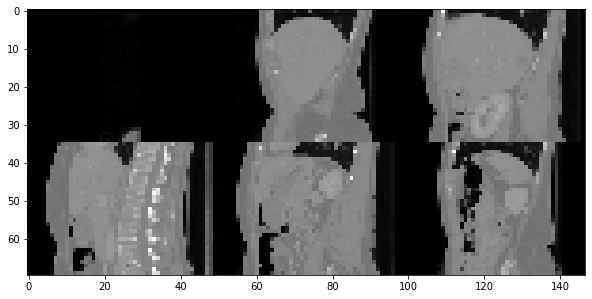

In [17]:
plt.figure(figsize=[10, 8])
sed3.show_slices(data3d, slice_number=6, axis=2)
# sed3.ipy_show_slices(data3d)# , contour=datap_liver.data3d)

# Save data

In [19]:
io3d.write({"data3d": data3d, "voxelsize_mm": new_voxelsize_mm}, "resized.mhd")

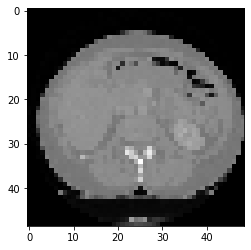

In [27]:
dp = io3d.read("resized.mhd")
plt.imshow(dp.data3d[20, :, :], cmap="gray")

# Note on Google Drive

`SimpleITK` (which is internally used in `io3d`) has problems with czech diacritics and spaces in the filename during reading the image data. This may cause problems for Google Drive. The problem can be solved by mounting the problematic path as a new drive:

```cmd
subst H: "G:\Můj disk\data"
```

If you want to run this automatically on startup, just create file `C:\Users\<název účtu>\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Startup\init_h_drive.bat` with fallowing content.

```cmd
CHCP 65001
subst H: "G:\Můj disk\data"
pause
```
